In [1]:
using StatsPlots, Statistics, Distributions, Random

In [2]:
function generate_midpoints(n_bins)
    quantiles = Array{Float64}(undef, n_bins)
    quantile_midpoints = Array{Float64}(undef, n_bins)

    #generate the quantile midpoints
    for i = 1:n_bins
        quantiles[i] = i/n_bins
        quantile_midpoints[i] = i/n_bins - (1/2)*(1/n_bins)
    end

    return vec(quantiles), vec(quantile_midpoints)
end

generate_midpoints (generic function with 1 method)

In [3]:
function add_distributions(list1, list2)
    sum_list = Array{Float64}(undef, length(list1)^2)
    
    list1 = repeat(list1, length(list1))
    list1 = sort(list1)
    list2 = repeat(list2, length(list2))
    
    for i in eachindex(sum_list)
        sum_list[i] = list1[i] + list2[i]
    end
    
    return vec(sort(sum_list))
end

add_distributions (generic function with 1 method)

In [4]:
function multiply_distributions(list1, list2)
    sum_list = Array{Float64}(undef, length(list1)^2)
    
    list1 = repeat(list1, length(list1))
    list1 = sort(list1)
    list2 = repeat(list2, length(list2))
    
    for i in eachindex(sum_list)
        sum_list[i] = list1[i] * list2[i]
    end
    
    return vec(sort(sum_list))
end

multiply_distributions (generic function with 1 method)

In [5]:
function re_bin(distribution, n_bins)
    rebinned = reshape(distribution, n_bins, n_bins)
    rebinned = mean(rebinned, dims = 1)
    
    return vec(rebinned)
end

re_bin (generic function with 1 method)

In [6]:
function calculate_mean(RV, n_bins)
    return sum(RV .* 1/n_bins)
end

calculate_mean (generic function with 1 method)

In [7]:
function calculate_variance(RV, calculated_mean, n_bins)
    return sum(RV.^2 * (1/n_bins)) - calculated_mean^2
end

calculate_variance (generic function with 1 method)

In [19]:
function sheppards_correction(calculated_var, n_bins)
    return calculated_var - (1/12)*(1/n_bins)^2
end

sheppards_correction (generic function with 1 method)

In [49]:
n_bins = 9
n_RVs = 30
μ = 6
σ = 3

mean_sum = 0
var_sum = 0

RV_list = Array{Distribution}(undef, n_RVs)

for i = 1:n_RVs
#     μ = rand(5:10)
#     σ = rand(1:6)
    
    temp_RV = Normal(μ, σ)
    RV_list[i] = temp_RV
    
    mean_sum = mean_sum + μ
    var_sum = var_sum + σ^2
end


In [50]:
quantiles, quantile_boundaries = generate_midpoints(n_bins)

additive_final_RV = pop!(RV_list)
additive_final_RV = quantile.(additive_final_RV, quantile_boundaries)

for RV in RV_list
    temp_list = quantile.(RV, quantile_boundaries)
    
    additive_final_RV = add_distributions(temp_list, additive_final_RV)
    additive_final_RV = re_bin(additive_final_RV, n_bins) 
end


In [51]:
calc_mean = calculate_mean(additive_final_RV, n_bins)
calc_var = calculate_variance(additive_final_RV, calc_mean, n_bins)
calc_var = sheppards_correction(calc_var, n_bins)

println("Expected Additive Mean is: ", mean_sum)
println("Calculated Additive Mean is: ", calc_mean)

println("Expected Additive Variance is: ", var_sum)
println("Calculated Additive Variance is: ", calc_var)

Expected Additive Mean is: 180
Calculated Additive Mean is: 179.99999999999994
Expected Additive Variance is: 270
Calculated Additive Variance is: 176.12714893795214


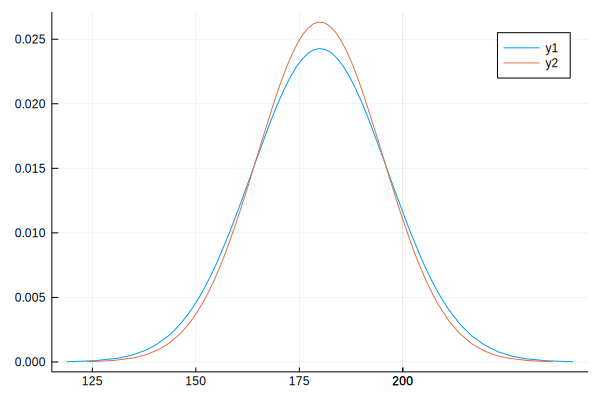

In [11]:
plot(Normal(mean_sum, var_sum^0.5))
plot!(Normal(calc_mean, calc_var^0.5))